In [1]:
import scipy.linalg as la
from math_functions.Get_state_index import Get_State_index
from main_grape.Grape import Grape
%pylab inline
import random as rd
import time
from IPython import display


Populating the interactive namespace from numpy and matplotlib


In [5]:
#Defining time scales
total_time = 10.0
steps = 300


#Defining H0

H0 = np.zeros([4,4])
       

#Defining Forbidden sates

#states_forbidden_list = []

#Defining Concerned states (starting states)
psi0 = [0,1,2,3]

#Defining states to include in the drawing of occupation
states_draw_list = [0,1,2,3]
states_draw_names = ['00','01','10','11']

#Defining U (Target)

U= np.identity(4)
U[3,3] = -1


#Defining U0 (Initial)
qq_identity = np.identity(4)
U0= qq_identity

#Defining control Hs
Q_x   = np.diag(np.sqrt(np.arange(1,2)),1)+np.diag(np.sqrt(np.arange(1,2)),-1)
Q_y   = (0+1j) *(np.diag(np.sqrt(np.arange(1,2)),1)-np.diag(np.sqrt(np.arange(1,2)),-1))
Q_z   = np.diag(np.arange(0,2))
Q_I = np.identity(2)

Q_xx = np.kron(Q_x,Q_x)
Q_yy = np.kron(Q_y,Q_y)
Q_zz = np.kron(Q_z,Q_z)
Q_x1 = np.kron(Q_x,Q_I)
Q_y1 = np.kron(Q_y,Q_I)
Q_z1 = np.kron(Q_z,Q_I)
Q_x2 = np.kron(Q_I,Q_x)
Q_y2 = np.kron(Q_I,Q_y)
Q_z2 = np.kron(Q_I,Q_z)

Hops = [Q_x1,Q_y1,Q_z1,Q_x2,Q_y2,Q_z2, Q_xx+Q_yy+Q_zz]
ops_max_amp = [4.0,4.0, 2*np.pi*2.0, 4.0,4.0, 2*np.pi*2.0, 4.0]
Hnames =['x1','y1', 'z1','x2','y2', 'z2','xx+yy+zz']

#Defining convergence parameters
max_iterations = 500
decay = max_iterations/2
convergence = {'rate':0.01, 'update_step':50, 'max_iterations':max_iterations,\
               'conv_target':1e-8,'learning_rate_decay':decay}
reg_coeffs = {'alpha' : 0.01, 'z':0.01, 'dwdt':0.01,'d2wdt2':0.001*0.0001, 'inter':100}
#multi_mode = {'dressed':dressed, 'vectors':v_c, 'qnum':qubit_state_num, 'mnum': mode_state_num,\
              #'f':freq_ge, 'es':w_c, 'g1':qm_g1, 'D':D, 'Interpolation':True, 'Modulation':True}
print U

[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0. -1.]]


L-BFGS-B optimization done


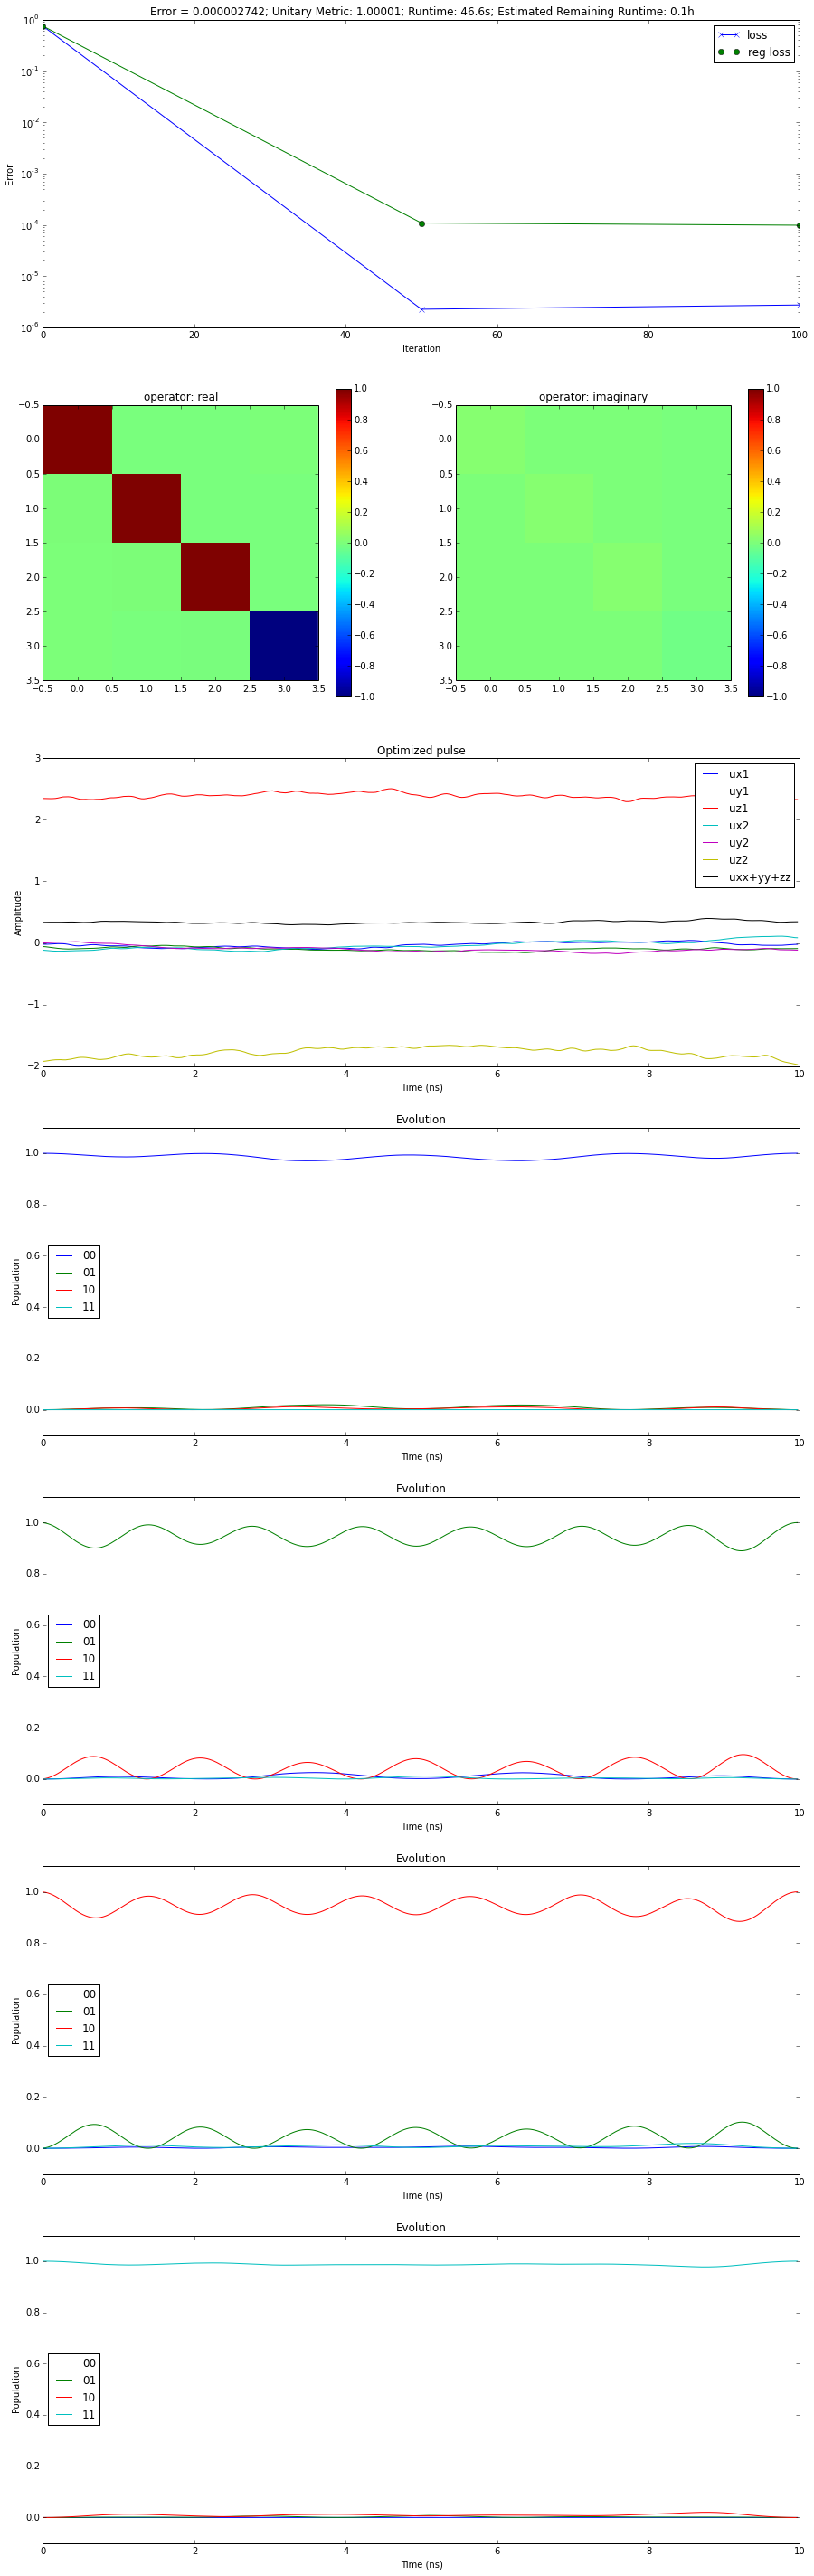

In [6]:
 #Extra options
#reg_coeffs = reg_coeffs,draw = [states_draw_list,states_draw_names] ,forbidden = states_forbidden_list,multi_mode = multi_mode,
#maxA = ops_max_amp,use_gpu = True
uks,U_f =Grape(H0,Hops,Hnames,U,U0,total_time,steps,psi0,convergence,method = 'L-BFGS-B',switch=False, draw = [states_draw_list,states_draw_names] , maxA = ops_max_amp, use_gpu=True)